In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [48]:
train=pd.read_csv('Data_Train.csv', encoding= 'unicode_escape')
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [49]:
train.shape

(12690, 9)

In [50]:
test=pd.read_csv('Data_Test.csv', encoding= 'unicode_escape')
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon  12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am  12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am  11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am  10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am  10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [51]:
test.shape

(4231, 8)

# Creating completed Restaurant dataset.
1. Since we have both train and test data we need to combine them and create single dataset for it.
2. It's been observed train data set has 'Cost' column which is missing from train data set and needs an update.
3. Columns TIME and LOCALITY can be dropped for getting better modelling.

In [52]:
# Concat train and test dataframes
data=pd.concat([train,test], axis=0)

In [53]:
data.shape

(16921, 9)

In [54]:
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [55]:
data.drop(['LOCALITY','TIME'], axis=1 ,inplace=True)
data.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,Mumbai,3.8,165 votes,300.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   CITY           16774 non-null  object 
 4   RATING         16917 non-null  object 
 5   VOTES          15315 non-null  object 
 6   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


In [57]:
data['TITLE']= data['TITLE'].replace(to_replace='[ ]', value='', regex=True)
data['CUISINES']=data['CUISINES'].replace(to_replace='[ , ]', value='', regex=True)
data['CITY']=data['CITY'].replace(to_replace='[^a-zA-Z]', value='', regex=True)
#data['TIME']=data['TIME'].replace(to_replace='[a-zA-Z]', value='', regex=True)
data['VOTES']=data['VOTES'].replace(to_replace='[votes]', value='', regex=True)
data['RATING']=data['RATING'].replace(to_replace='[- NEW]', value='', regex=True)

data

,TITLE,RESTAURANT_ID,CUISINES,CITY,RATING,VOTES,COST
0,CASUALDINING,9438,MalwaniGoanNorthIndian,Thane,3.6,49,1200.0
1,"CASUALDINING,BAR",13198,AsianModernIndianJapanese,Chennai,4.2,30,1500.0
2,CASUALDINING,10915,NorthIndianChineseBiryaniHyderabadi,Chennai,3.8,221,800.0
3,QUICKBITES,6346,TibetanChinese,Mumbai,4.1,24,800.0
4,DESSERTPARLOR,15387,Desserts,Mumbai,3.8,165,300.0
...,...,...,...,...,...,...,...
4226,CASUALDINING,9057,NorthIndianMughlaiChinese,NewDelhi,3.9,287,NaN
4227,None,1247,BiryaniNorthIndianSandwichSaladWraps,Bangalore,4.3,469,NaN
4228,QUICKBITES,8617,ContinentalNorthIndian,Faridabad,3.7,53,NaN
4229,QUICKBITES,6485,RollsBeverages,Kochi,,NaN,NaN


In [58]:
data['RATING'] = pd.to_numeric(data['RATING'])
data['VOTES'] = pd.to_numeric(data['VOTES'])

#data['CITY'].to_csv('CityData.csv')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   CITY           16774 non-null  object 
 4   RATING         15315 non-null  float64
 5   VOTES          15315 non-null  float64
 6   COST           12690 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.0+ MB


In [60]:
# Checking which all columns have null values
data.isnull().sum().sort_values(ascending=False)

COST             4231
VOTES            1606
RATING           1606
CITY              147
CUISINES            0
RESTAURANT_ID       0
TITLE               0
dtype: int64

In [61]:
data.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,16921.000000,15315.000000,15315.000000,12690.000000
mean,7767.211631,3.784473,419.194254,655.252246
std,4493.287626,0.424935,839.915407,627.003540
min,0.000000,2.000000,3.000000,20.000000
25%,3873.000000,3.500000,57.000000,300.000000
50%,7751.000000,3.800000,164.000000,500.000000
75%,11672.000000,4.100000,462.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


In [62]:
data['CITY'].fillna('Mumbai', inplace=True)
data['COST'].fillna(data['COST'].mean(), inplace=True)
data['VOTES'].fillna(data['VOTES'].mean(), inplace=True)
data['RATING'].fillna(data['RATING'].mean(), inplace=True)


In [63]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

data['TITLE'] = le.fit_transform(data['TITLE'])
data['CUISINES'] = le.fit_transform(data['CUISINES'])
data['CITY'] = le.fit_transform(data['CITY'])


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  int32  
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  int32  
 3   CITY           16921 non-null  int32  
 4   RATING         16921 non-null  float64
 5   VOTES          16921 non-null  float64
 6   COST           16921 non-null  float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 859.3 KB


In [65]:
data.describe()

,TITLE,RESTAURANT_ID,CUISINES,CITY,RATING,VOTES,COST
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,65.004137,7767.211631,2801.307547,141.485491,3.784473,419.194254,655.252246
std,35.875571,4493.287626,1504.788714,86.361205,0.404266,799.060550,542.979598
min,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,20.000000
25%,34.000000,3873.000000,1478.000000,58.000000,3.600000,64.000000,350.000000
50%,64.000000,7751.000000,3054.000000,132.000000,3.800000,202.000000,600.000000
75%,104.000000,11672.000000,4008.000000,222.000000,4.000000,419.194254,655.252246
max,122.000000,15573.000000,5182.000000,376.000000,4.900000,41186.000000,14000.000000


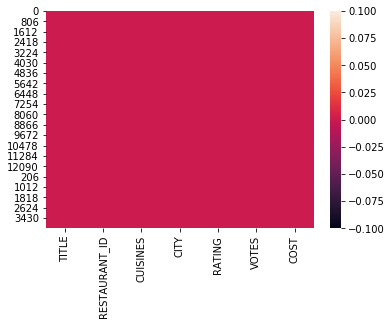

In [66]:
# Checking for null using HeatMap
sns.heatmap(data.isnull())

In [67]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[8.64238592e-01, 3.71851945e-01, 3.27426042e-01, ...,
        4.56329133e-01, 4.63300552e-01, 1.00328604e+00],
       [8.08488703e-01, 1.20868044e+00, 1.61974870e+00, ...,
        1.02788735e+00, 4.87079177e-01, 1.55580931e+00],
       [8.64238592e-01, 7.00574201e-01, 6.16511712e-01, ...,
        3.84096941e-02, 2.48041417e-01, 2.66588343e-01],
       ...,
       [1.08700752e+00, 1.89129553e-01, 4.73374494e-01, ...,
        2.08959719e-01, 4.58294525e-01, 0.00000000e+00],
       [1.08700752e+00, 2.85370007e-01, 1.18205632e+00, ...,
        3.95474715e-14, 0.00000000e+00, 0.00000000e+00],
       [1.08700752e+00, 1.18985697e+00, 4.58345299e-01, ...,
        2.08959719e-01, 4.45779459e-01, 0.00000000e+00]])

In [68]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([   68,    84,   159,   186,   196,   208,   293,   303,   304,
         308,   337,   344,   354,   379,   422,   431,   469,   502,
         510,   563,   599,   637,   672,   688,   731,   770,   775,
         796,   839,   852,   855,   872,   897,   913,   933,   966,
         967,   973,  1008,  1020,  1034,  1038,  1078,  1132,  1133,
        1147,  1151,  1193,  1244,  1288,  1345,  1346,  1395,  1467,
        1470,  1475,  1476,  1519,  1522,  1540,  1589,  1594,  1617,
        1632,  1652,  1657,  1681,  1685,  1752,  1759,  1773,  1778,
        1816,  1828,  1850,  1878,  1884,  1916,  1930,  1931,  1973,
        2068,  2090,  2100,  2111,  2116,  2123,  2130,  2144,  2188,
        2204,  2205,  2207,  2247,  2258,  2268,  2290,  2302,  2305,
        2305,  2333,  2339,  2349,  2369,  2459,  2488,  2523,  2531,
        2565,  2604,  2610,  2622,  2683,  2686,  2689,  2695,  2740,
        2778,  2839,  2886,  2905,  2921,  2940,  2969,  2973,  2977,
        3002,  3028

In [69]:
# Removing the outliers having zscore value of more than 3.
restaurant_data=data[(z<3).all(axis=1)]
restaurant_data

,TITLE,RESTAURANT_ID,CUISINES,CITY,RATING,VOTES,COST
0,34,9438,3294,324,3.600000,49.000000,1200.000000
1,36,13198,364,58,4.200000,30.000000,1500.000000
2,34,10915,3729,58,3.800000,221.000000,800.000000
3,104,6346,5156,222,4.100000,24.000000,800.000000
4,55,15387,2218,222,3.800000,165.000000,300.000000
...,...,...,...,...,...,...,...
4226,34,9057,4259,253,3.900000,287.000000,655.252246
4227,95,1247,785,33,4.300000,469.000000,655.252246
4228,104,8617,2089,100,3.700000,53.000000,655.252246
4229,104,6485,4580,169,3.784473,419.194254,655.252246


In [70]:
restaurant_data.skew()

TITLE           -0.078793
RESTAURANT_ID    0.010549
CUISINES        -0.223136
CITY             0.237496
RATING          -0.439596
VOTES            2.520124
COST             1.680988
dtype: float64

In [71]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

restaurant_data['VOTES']=boxcox1p(restaurant_data['VOTES'],0.5)


In [72]:
restaurant_data.skew()

TITLE           -0.078793
RESTAURANT_ID    0.010549
CUISINES        -0.223136
CITY             0.237496
RATING          -0.439596
VOTES            1.067669
COST             1.680988
dtype: float64

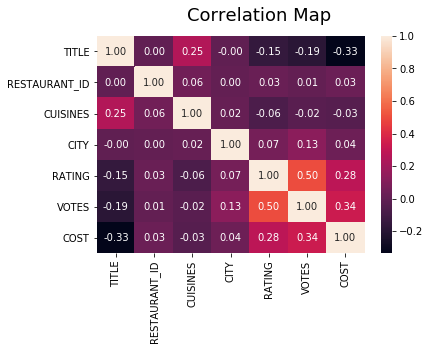

In [73]:
sns.heatmap(restaurant_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [74]:
# Setting x  by excluding Fees column which is y here for prediction.
x=restaurant_data.drop(['COST'],axis=1)
x

,TITLE,RESTAURANT_ID,CUISINES,CITY,RATING,VOTES
0,34,9438,3294,324,3.600000,12.142136
1,36,13198,364,58,4.200000,9.135529
2,34,10915,3729,58,3.800000,27.799329
3,104,6346,5156,222,4.100000,8.000000
4,55,15387,2218,222,3.800000,23.768197
...,...,...,...,...,...,...
4226,34,9057,4259,253,3.900000,31.941125
4227,95,1247,785,33,4.300000,41.358967
4228,104,8617,2089,100,3.700000,12.696938
4229,104,6485,4580,169,3.784473,38.997281


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [76]:
# Settng Y
y=restaurant_data['COST']
y

0       1200.000000
1       1500.000000
2        800.000000
3        800.000000
4        300.000000
           ...     
4226     655.252246
4227     655.252246
4228     655.252246
4229     655.252246
4230     655.252246
Name: COST, Length: 16222, dtype: float64

In [77]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  45  is  0.20697886328951187


In [78]:
# Setting the test x & y values and using the random state from above step which is 56.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=45)

In [79]:
train_x.shape

(12166, 6)

In [80]:
train_y.shape

(12166,)

In [81]:
test_x.shape

(4056, 6)

In [82]:
test_y.shape

(4056,)

In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.01)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.01)
RF = RandomForestRegressor(n_estimators=200,random_state=10)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [85]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [86]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 282.5051080632434
Mean squared error 151924.4774287739
Root Mean absolute error 389.77490610450275
Score:  0.275442798968653


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 282.5051080632434
Mean squared error 151924.4774287739
Root Mean absolute error 389.77490610450275
Score:  0.15948870079677635


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 282.5051080632434
Mean squared error 151924.4774287739
Root Mean absolute error 389.77490610450275
Score:  0.20950941022806646


----------

In [87]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,27.544280
1,SVR,15.948870
2,LinearRegression,20.950941
3,DecisionTreeRegressor,1.247627
4,Lasso,20.950906
5,Ridge,20.950941
6,ElasticNet,20.950003
7,RandomForestRegressor,44.163595
8,AdaBoostRegressor,13.001515
9,GradientBoostingRegressor,44.341995


# From the above table GradientBoostingRegressor seems to be the best model with over 44% accuracy.

In [88]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
restaurant_data.to_csv('RestCost_Predict.csv')
predictData

,0
0,386.262373
1,706.166174
2,701.681366
3,1012.015921
4,630.927092
...,...
4051,546.719018
4052,439.312364
4053,830.755755
4054,456.889953


In [89]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(GB,"GB_RestaurantCost.pkl")

['GB_RestaurantCost.pkl']